$$ N(\Delta d) = \frac{2 \Delta d}{\lambda} $$

In [87]:
c_he = 543*10**(-3)  
c_ar = 488*10**(-3) 
c_kr = 568*10**(-3) 

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import sklearn.metrics as sm

In [89]:
d = np.arange(2, 22, 2)  #mm

In [90]:
def N_he(dim):
    return 2*dim/c_he

def N_ar(dim):
    return 2*dim/c_ar

def N_kr(dim):
    return 2*dim/c_kr

In [99]:
n_he = [7, 13, 21, 27, 36, 42,50, 55, 62, 70]

n_ar = [8, 15, 24, 33, 40, 46, 55, 63, 70, 78]

n_kr = [8, 14, 20, 26, 33, 40, 47, 55, 60, 67]

In [147]:
data = {
    'd [mm]': d,
    'N (he)': n_he,
    'N (ar)': n_ar,
    'N (kr)': n_kr,
}

In [148]:
df = pd.DataFrame(data).round(0)

In [190]:
df.to_excel('dados_proj.xlsx', index=False)

In [149]:
display(df)

,d [mm],N (he),N (ar),N (kr)
0,2,7,8,8
1,4,13,15,14
2,6,21,24,20
3,8,27,33,26
4,10,36,40,33
5,12,42,46,40
6,14,50,55,47
7,16,55,63,55
8,18,62,70,60
9,20,70,78,67


In [150]:
def fit_test(x, a, b):
    return a*x + b

In [159]:
params_he, params_covariance_he = optimize.curve_fit(fit_test, d, n_he)
A_he, B_he = params_he
round(A_he, 4), round(B_he, 4)

(3.5, -0.2)

In [160]:
params_ar, params_covariance_ar = optimize.curve_fit(fit_test, d, n_ar)
A_ar, B_ar = params_ar
round(A_ar, 4), round(B_ar, 4)

(3.8848, 0.4667)

In [162]:
params_kr, params_covariance_kr = optimize.curve_fit(fit_test, d, n_kr)
A_kr, B_kr = params_kr
round(A_kr, 4), round(B_kr, 4)

(3.3273, 0.4)

In [163]:
plt.style.use(['science', 'notebook', 'grid'])

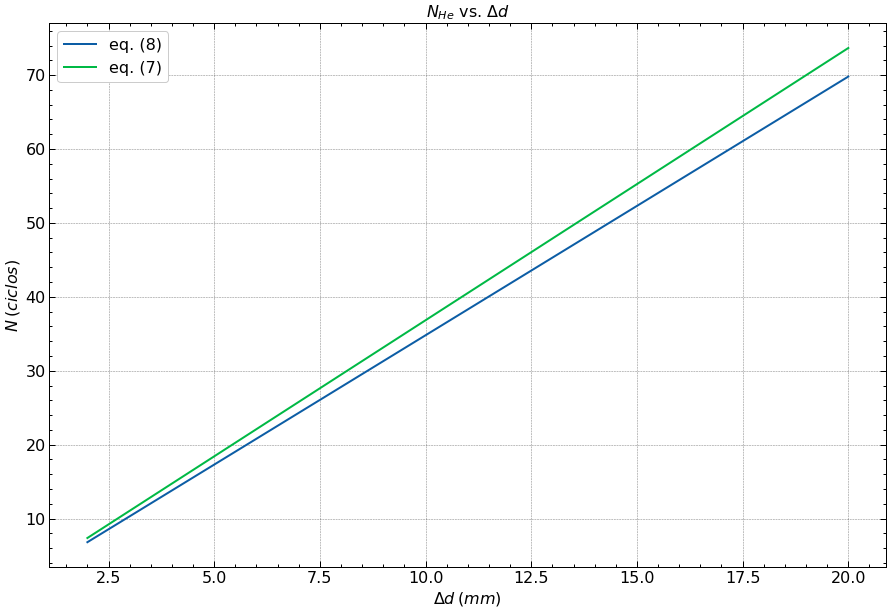

In [192]:
figure = plt.figure(figsize=(15, 10))
plt.plot(d, fit_test(d, A_he, B), label='eq. (8)')
plt.plot(d, N_he(d), label = 'eq. (7)')
plt.xlabel('$\Delta d \: (mm)$')
plt.ylabel('$ N \: (ciclos) $')
plt.title('$N_{He}$ vs. $ \Delta d $ ')
plt.legend()
plt.show()

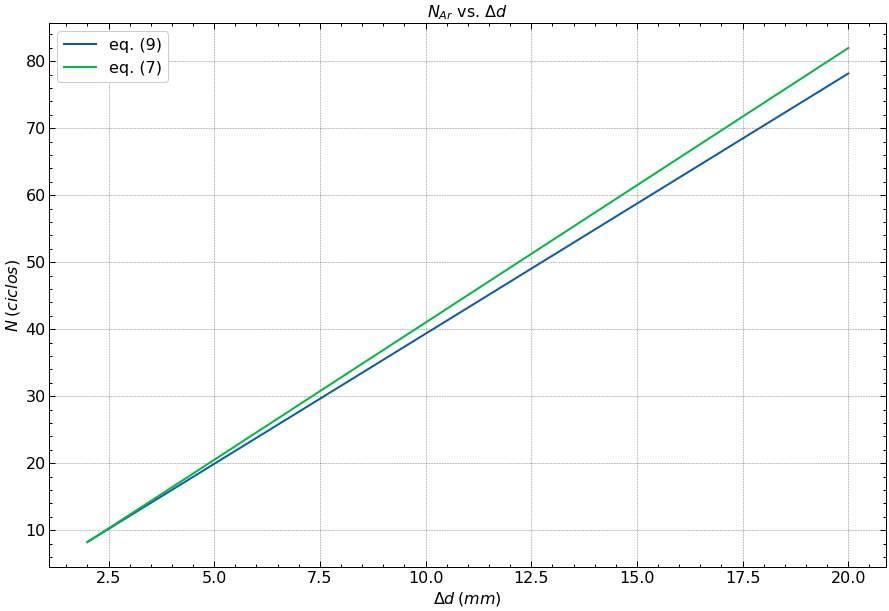

In [193]:
figure = plt.figure(figsize=(15, 10))
plt.plot(d, fit_test(d, A_ar, B_ar), label='eq. (9)')
plt.plot(d, N_ar(d), label = 'eq. (7)')
plt.xlabel('$\Delta d \: (mm)$')
plt.ylabel('$ N \: (ciclos) $')
plt.title('$N_{Ar}$ vs. $ \Delta d $ ')
plt.legend()
plt.show()

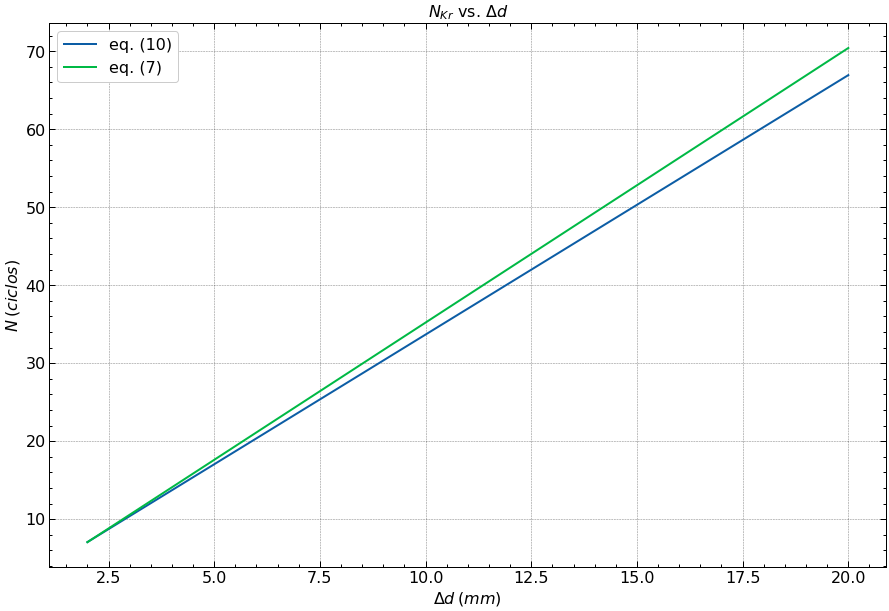

In [194]:
figure = plt.figure(figsize=(15, 10))
plt.plot(d, fit_test(d, A_kr, B_kr), label='eq. (10)')
plt.plot(d, N_kr(d), label = 'eq. (7)')
plt.xlabel('$\Delta d \: (mm)$')
plt.ylabel('$ N \: (ciclos) $')
plt.title('$N_{Kr}$ vs. $ \Delta d $ ')
plt.legend()
plt.show()

In [179]:
prev1 = []

for c in range(len(d)):
    prev1.append(fit_test(d[c], A_he, B_he))

In [180]:
prev2 = []

for c in range(len(d)):
    prev2.append(fit_test(d[c], A_ar, B_ar))

In [181]:
prev3 = []

for c in range(len(d)):
    prev3.append(fit_test(d[c], A_kr, B_kr))

In [187]:
r_squared = sm.r2_score(n_he, prev1)
round(r_squared*100, 4)

99.8617

In [188]:
r_squared = sm.r2_score(n_ar, prev2)
round(r_squared*100, 4)

99.8952

In [189]:
r_squared = sm.r2_score(n_kr, prev3)
round(r_squared*100, 4)

99.8728

In [196]:
d_med_he = sum(n_he)/len(n_he)
d_med_ar = sum(n_ar)/len(n_ar)
d_med_kr = sum(n_kr)/len(n_kr)

In [203]:
comp_he = round(2000*d_med_he/( fit_test(d_med_he, A_he, B_he) ), 2)
comp_ar = round(2000*d_med_ar/( fit_test(d_med_ar, A_ar, B_ar) ), 2)
comp_kr = round(2000*d_med_kr/( fit_test(d_med_kr, A_he, B_kr) ), 2)

In [204]:
comp_he, comp_ar, comp_kr

(572.28, 513.39, 569.67)

In [218]:
erro_he = round(abs(100*(comp_he - (c_he*10**3))/(c_he*10**3)), 2)
erro_he

5.39

In [219]:
erro_ar = round(abs(100*(comp_ar - (c_ar*10**3))/(c_ar*10**3)), 2)
erro_ar

5.2

In [220]:
erro_kr = round(abs(100*(comp_kr - (c_kr*10**3))/(c_kr*10**3)), 2)
erro_kr

0.29